<a href="https://colab.research.google.com/github/shielamms/Tensorflow-Notebooks/blob/main/Horse_or_Human_Training_a_CNN_with_generated_images_on_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the training dataset

First, download the datasets:

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-03-14 23:15:05--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  23.9MB/s    in 7.0s    

2023-03-14 23:15:13 (20.5 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-03-14 23:15:14--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  7.21MB/s    in 1.5s    

2023-03-14 23:15:17 (7.21 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
import zipfile

In [4]:
# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [5]:
!ls ./horse-or-human

horses	humans


In [6]:
!ls ./validation-horse-or-human

horses	humans


In [7]:
import os

In [8]:
train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

In [9]:
len(train_horse_names)

500

In [10]:
len(train_human_names)

527

In [11]:
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

In [12]:
len(validation_horse_names)

128

In [13]:
len(validation_human_names)

128

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Output images in 4x4 grid
nrows = 4
ncols = 4

pic_idx = 0

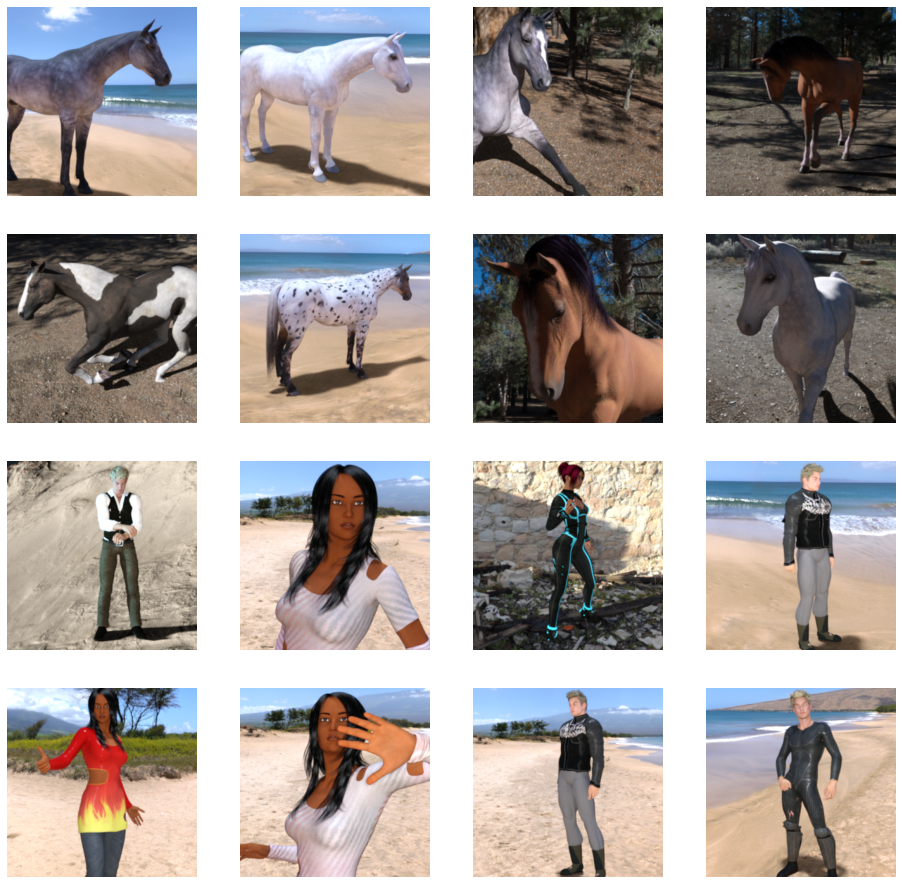

In [15]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_idx += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_idx-8:pic_idx]]
next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_idx-8:pic_idx]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building the CNN Model

In [16]:
import tensorflow as tf

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 64)      

In [27]:
# RMSprop automates learning rate-tuning
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

## Pre-processing

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(150,150),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [31]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    './validation-horse-or-human/',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


## Training

In [32]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 8s 667ms/step - loss: 1.6282 - accuracy: 0.5551 - val_loss: 0.6750 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 855ms/step - loss: 0.5939 - accuracy: 0.6641 - val_loss: 0.8970 - val_accuracy: 0.5078
Epoch 3/15
8/8 [==============================] - 6s 706ms/step - loss: 0.5946 - accuracy: 0.7197 - val_loss: 0.5034 - val_accuracy: 0.7148
Epoch 4/15
8/8 [==============================] - 7s 847ms/step - loss: 0.2890 - accuracy: 0.9287 - val_loss: 1.1042 - val_accuracy: 0.6562
Epoch 5/15
8/8 [==============================] - 6s 725ms/step - loss: 0.1918 - accuracy: 0.9177 - val_loss: 0.2842 - val_accuracy: 0.8906
Epoch 6/15
8/8 [==============================] - 6s 852ms/step - loss: 0.2142 - accuracy: 0.9110 - val_loss: 1.3725 - val_accuracy: 0.7344
Epoch 7/15
8/8 [==============================] - 6s 793ms/step - loss: 0.1087 - accuracy: 0.9689 - val_loss: 1.1523 - val_accuracy: 0.8008
Epoch 8/15
8/8 [====

## Testing

In [34]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving author.jpg to author (1).jpg
1/1 [==============================] - 0s 147ms/step
[7.321958e-10]
author.jpg is a horse
